In [1]:
# tensorflow_federated_nightly also bring in tf_nightly, which
# can causes a duplicate tensorboard install, leading to errors.
!pip uninstall --yes tensorboard tb-nightly

!pip install --quiet --upgrade tensorflow_federated_nightly
!pip install --quiet --upgrade nest_asyncio
!pip install --quiet tb-nightly  # or tensorboard, but not both

import nest_asyncio
nest_asyncio.apply()

Found existing installation: tb-nightly 2.5.0a20210103
Uninstalling tb-nightly-2.5.0a20210103:
  Successfully uninstalled tb-nightly-2.5.0a20210103
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tf-nightly 2.5.0.dev20210103 requires grpcio~=1.34.0, but you'll have grpcio 1.32.0 which is incompatible.
tf-nightly 2.5.0.dev20210103 requires h5py~=3.1.0, but you'll have h5py 2.10.0 which is incompatible.


In [2]:
%load_ext tensorboard

In [3]:
import collections

import numpy as np
import tensorflow as tf
import tensorflow_federated as tff

np.random.seed(0)

tff.federated_computation(lambda: 'Hello, World!')()

/home/yitzhang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow_addons/utils/ensure_tf_install.py:43: UserWarning: You are currently using a nightly version of TensorFlow (2.5.0-dev20210103). 
TensorFlow Addons offers no support for the nightly versions of TensorFlow. Some things might work, some other might not. 
If you encounter a bug, do not file an issue on GitHub.
  UserWarning,


Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


b'Hello, World!'

In [4]:
import pandas as pd
import numpy as np

filename = 'BRAZPD_UnofM_all.csv'

df = pd.read_csv(filename, engine='python')

In [5]:
display(df)

,CODPAX,Hemoglobin,Potassium,Phosphate,Mean_PAS_1T,Mean_PAD_1T,Mean_PAS_2T,Mean_PAD_2T,Mean_PAS_3T,Mean_PAD_3T,...,Diastolic70,Systolic71,Diastolic71,Systolic72,Diastolic72,Systolic73,Diastolic73,Systolic74,Diastolic74,_merge
0,1349037,12.933333,4.433333,5.300000,110.500000,70.000000,125.000000,80.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,1349040,14.000000,3.766667,5.933333,129.500000,77.000000,120.333333,68.666667,136.000000,82.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,1349048,11.833333,4.366667,6.100000,158.000000,81.000000,154.666667,87.666667,147.000000,80.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,1349051,10.066667,4.733333,5.533333,140.000000,75.000000,147.333333,92.333333,169.333333,99.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,1349055,11.933333,4.033333,4.066667,103.500000,60.000000,154.666667,82.000000,129.333333,72.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,347457070,8.400000,5.500000,4.700000,126.666667,76.666667,126.666667,83.333333,120.000000,80.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5703,347457071,9.700000,4.300000,3.233333,130.000000,80.000000,113.333333,73.333333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5704,347457072,10.466667,4.433333,4.466667,136.666667,80.000000,143.333333,73.333333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5705,347457073,11.766667,4.533333,3.566667,126.666667,80.000000,136.666667,83.333333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


# Data Cleaning

In [6]:
import re

nMeasurements = 75
nColumns = 1735
nRecords = 5707
timeseries_names = ['Ureia', 'Creatinine', 'TGP', 'Potassium', 'Calcium', 'Phosphate', 'Glucose', 
              'Hemoglobin', 'Hematocrit','Volume_Total', 'Systolic', 'Diastolic', 'N_AH_']

different_format_ts_names = ['Mes_1_PAS', 'Mes_1_PAD', 'Mes_1_Uso_de_anti_hipert', 'Mes_1_inibidor',\
                             'Mes_1_beta', 'Mes_1_ant', 'Mes_1_diu', 'Mes_1_at_i', 'Mes_1_OUTROS']

# Put timeseries names into standard format
p = re.compile('[0-9]')
strip = re.compile('Mes_[0-9]_')
for timeseries in different_format_ts_names:
    for i in range(1,nMeasurements):
        try:
            old_label = p.sub(str(i), timeseries)
            new_label = strip.sub('',timeseries)
            df[new_label+str(i)] = pd.Series(df[old_label])
            df.drop([old_label],axis=1, inplace=True)
        except:
            print(f'Column {timeseries}{i} does not exist')
    timeseries_names.append(new_label)
    
# make sure we don't have duplicate columns
assert nColumns == df.shape[1]

display(df)

,CODPAX,Hemoglobin,Potassium,Phosphate,Mean_PAS_1T,Mean_PAD_1T,Mean_PAS_2T,Mean_PAD_2T,Mean_PAS_3T,Mean_PAD_3T,...,OUTROS65,OUTROS66,OUTROS67,OUTROS68,OUTROS69,OUTROS70,OUTROS71,OUTROS72,OUTROS73,OUTROS74
0,1349037,12.933333,4.433333,5.300000,110.500000,70.000000,125.000000,80.000000,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1349040,14.000000,3.766667,5.933333,129.500000,77.000000,120.333333,68.666667,136.000000,82.000000,...,0,0,0,0,0,0,0,0,0,0
2,1349048,11.833333,4.366667,6.100000,158.000000,81.000000,154.666667,87.666667,147.000000,80.000000,...,0,0,0,0,0,0,0,0,0,0
3,1349051,10.066667,4.733333,5.533333,140.000000,75.000000,147.333333,92.333333,169.333333,99.000000,...,0,0,0,0,0,0,0,0,0,0
4,1349055,11.933333,4.033333,4.066667,103.500000,60.000000,154.666667,82.000000,129.333333,72.666667,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,347457070,8.400000,5.500000,4.700000,126.666667,76.666667,126.666667,83.333333,120.000000,80.000000,...,0,0,0,0,0,0,0,0,0,0
5703,347457071,9.700000,4.300000,3.233333,130.000000,80.000000,113.333333,73.333333,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5704,347457072,10.466667,4.433333,4.466667,136.666667,80.000000,143.333333,73.333333,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5705,347457073,11.766667,4.533333,3.566667,126.666667,80.000000,136.666667,83.333333,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


# Feature Selection and Combination

In [7]:
# Separate features to unique features and time series features
timeseries_cols = []
time_indices = str(np.arange(100))
# print(time_indices)
for col in list(df.columns):
    add = True
    for idx in time_indices:
        if idx in col:
            add = False
    if add == False:
        timeseries_cols.append(col)
        
# Adjust missclassified features
adjlist = ['ModalidadeCAPD0APD1Mix2', 'Dropoutsim1', 'Agedic65', 'Educationdic4y', 
           'Followup1y', 'Followup2y', 'Followup3y', "death_event_1y","Tech_event_1y",
          "death_event_2y","Tech_event_2y", "death_event_3y","Tech_event_3y"]
for i in range(len(adjlist)):
    timeseries_cols.remove(adjlist[i])
    
unique_cols = ['Hemoglobin', 'Potassium', 'Phosphate',\
                'Mean_PAS_1T', 'Mean_PAD_1T',\
                 'FRR', 'codigoclinica', 'ModalidadeCAPD0APD1Mix2',\
                'CenterSizenpatients', 'ModalidadeDPInicial', 'Age',\
                'BMI', 'IncidentinPD', 'PrevalentinPDNet', \
                'DialysisvintageprePDNet', 'totaldialysisvintage',\
                'Educationlevel', 'Primaryrenaldisease', 'PreviousHD',\
                'Previoustx', 'DaviesScore', 'Peripheralarterydisease',\
                'DM', 'CAD', 'LVH', 'LES', 'HF', 'Cancer', 'Stroke',\
                'Hypertension', 'HIV', 'HCV', 'HBC', 'Gender', 'Race',\
                'Familyincome', 'Distancefromcenter', 'predialysiscare',\
                'timeofpredialysiscare', 'Agedic65', 'Racedicwhite', 'Educationdic4y',\
                'Daviesdic', 'Incomesdic', 'Region', 'Centerexperiencepatientyear',\
                'Regionsdic', 'cidade', 'BMI_Cat',\
                'BMI_dic']

print(unique_cols)
print(timeseries_cols)

['Hemoglobin', 'Potassium', 'Phosphate', 'Mean_PAS_1T', 'Mean_PAD_1T', 'FRR', 'codigoclinica', 'ModalidadeCAPD0APD1Mix2', 'CenterSizenpatients', 'ModalidadeDPInicial', 'Age', 'BMI', 'IncidentinPD', 'PrevalentinPDNet', 'DialysisvintageprePDNet', 'totaldialysisvintage', 'Educationlevel', 'Primaryrenaldisease', 'PreviousHD', 'Previoustx', 'DaviesScore', 'Peripheralarterydisease', 'DM', 'CAD', 'LVH', 'LES', 'HF', 'Cancer', 'Stroke', 'Hypertension', 'HIV', 'HCV', 'HBC', 'Gender', 'Race', 'Familyincome', 'Distancefromcenter', 'predialysiscare', 'timeofpredialysiscare', 'Agedic65', 'Racedicwhite', 'Educationdic4y', 'Daviesdic', 'Incomesdic', 'Region', 'Centerexperiencepatientyear', 'Regionsdic', 'cidade', 'BMI_Cat', 'BMI_dic']
['Mean_PAS_1T', 'Mean_PAD_1T', 'Mean_PAS_2T', 'Mean_PAD_2T', 'Mean_PAS_3T', 'Mean_PAD_3T', 'Mean_PAS_4T', 'Mean_PAD_4T', 'Mean_PAS_5T', 'Mean_PAD_5T', 'Mean_PAS_6T', 'Mean_PAD_6T', 'Mean_PAS_7T', 'Mean_PAD_7T', 'Mean_PAS_8T', 'Mean_PAD_8T', 'CR_death_event_1y', 'CR_deat

In [8]:
# build baseline dataframe (without time-series data):
df_baseline = df[unique_cols].copy()
df_baseline = df_baseline.fillna(0)
# display(df_baseline)

targets = ['Dropoutsim1', 'Followup1y', 'Followup2y', 'Followup3y',\
           "death_event_1y","Tech_event_1y",\
           "death_event_2y","Tech_event_2y",\
           "death_event_3y","Tech_event_3y",\
           "Deathevent","TechniqueFailureevent","Causeofdeath","TechFailureDeathnotcens","Causeofdropout",\
           "Followup"]

# build targets dataframe:
Y = df[targets+['CODPAX']].copy()
# display(Y)

In [9]:
df_totalaverage = df[unique_cols].copy()

Group_p1 = []
Ms10ou_p1 = []

storage_p1 = [Group_p1, Ms10ou_p1]

Mean_PAS_p1 = []
Mean_PAD_p1 = []

Mean_PAS_p2 = []
Mean_PAD_p2 = []

storage_p2 = [Mean_PAS_p1, Mean_PAD_p1, Mean_PAS_p2, Mean_PAD_p2]

Ureia = dict()
Creatinine = dict()
TGP = dict()
Potassium = dict()
Calcium = dict()
Phosphate = dict()
Glucose = dict()
Hemoglobin = dict()
Hematocrit = dict()
Volume_Total = dict()
N_AH_ = dict()
Systolic = dict()
Diastolic = dict()
PAS = dict()
PAD = dict()
Uso_de_anti_hipert = dict()
inibidor = dict()


label_dict = [Ureia, Creatinine, TGP, Potassium, Calcium, Phosphate, Glucose, 
              Hemoglobin, Hematocrit, Volume_Total, N_AH_, Systolic, Diastolic, PAS, PAD, Uso_de_anti_hipert, inibidor]

label_str = ['Ureia', 'Creatinine', 'TGP', 'Potassium', 'Calcium', 'Phosphate', 'Glucose', 
              'Hemoglobin', 'Hematocrit','Volume_Total', 'N_AH_', 'Systolic', 'Diastolic','PAS','PAD',
             'Uso_de_anti_hipert', 'inibidor']

for item in label_dict:
    for i in range(13):
        key = 'p'+str(i+1)
        item[key] = []
    
label_idx = 0    
for item in label_dict:
    count = 0
    section = 1
    labelname = label_str[label_idx]
    for col in timeseries_cols:
        if labelname in col:
            if 'Mean_' not in col:            
                if count < 6:
                    count = count + 1
                else:
                    section = section + 1
                    count = 1
                key = 'p'+str(section)
                item[key].append(col)
    label_idx = label_idx + 1

indices_p1 = ['Group', 'Ms10ou']

indices_p2 = ['Mean_PAS', 'Mean_PAD']



# Select certain features as 1 section
for col in timeseries_cols:
    i = 0
    for idx in indices_p1:
        if idx in col:
            storage_p1[i].append(col)
        i = i + 1
# print(storage_p1)

# Separate certain features to 2 sections (each section contains 4 features)
i = 0 # i is the index of feature name
for idx in indices_p2:
    p = 0
    count = 0
    for col in timeseries_cols:
        if idx in col:
            if count < 4:
                storage_p2[i+2*p].append(col)
                count = count + 1
            else:
                count = 0
                p = p + 1
                storage_p2[i+2*p].append(col)
                count = count + 1
    i = i + 1

for i in range(len(indices_p1)):
    df_totalaverage.loc[:,indices_p1[i]] = df[storage_p1[i]].mean(axis=1)

for i in range(len(indices_p2)):
    for p in range(2):
        name = indices_p2[i] + '_p' + str(p+1)
        df_totalaverage.loc[:,name] = df[storage_p2[i+2*p]].mean(axis=1)       

label_idx = 0
for item in label_dict:
    for p in range(13):
        name = label_str[label_idx] + '_p' + str(p+1)
        df_totalaverage.loc[:,name] = df[item['p'+str(p+1)]].mean(axis=1)
    label_idx = label_idx + 1
        
    
df_totalaverage = df_totalaverage.fillna(0)
display(df_totalaverage)


,Hemoglobin,Potassium,Phosphate,Mean_PAS_1T,Mean_PAD_1T,FRR,codigoclinica,ModalidadeCAPD0APD1Mix2,CenterSizenpatients,ModalidadeDPInicial,...,inibidor_p4,inibidor_p5,inibidor_p6,inibidor_p7,inibidor_p8,inibidor_p9,inibidor_p10,inibidor_p11,inibidor_p12,inibidor_p13
0,12.933333,4.433333,5.300000,110.500000,70.000000,0,1,0,128,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14.000000,3.766667,5.933333,129.500000,77.000000,0,1,0,128,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11.833333,4.366667,6.100000,158.000000,81.000000,1,1,1,128,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.066667,4.733333,5.533333,140.000000,75.000000,1,1,0,128,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11.933333,4.033333,4.066667,103.500000,60.000000,0,1,2,128,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,8.400000,5.500000,4.700000,126.666667,76.666667,1,347,1,66,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5703,9.700000,4.300000,3.233333,130.000000,80.000000,1,347,1,66,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5704,10.466667,4.433333,4.466667,136.666667,80.000000,1,347,1,66,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5705,11.766667,4.533333,3.566667,126.666667,80.000000,1,347,1,66,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
baseline = df[unique_cols].copy()

numofpatient = baseline.shape[0]

labelnames = ['Ureia', 'Creatinine', 'TGP', 'Potassium', 'Calcium', 'Phosphate', 'Glucose', 
              'Hemoglobin', 'Hematocrit','Volume_Total', 'N_AH_', 'Systolic', 'Diastolic',
             'PAS', 'PAD', 'Uso_de_anti_hipert', 'inibidor']

dfs = [df[unique_cols], df[unique_cols], df[unique_cols]]
maxmonths = [6, 18, 30]


for year in range(3):
    for labelname in labelnames:
        for patient_idx in range(numofpatient):
            # compute the max index of month including nonzero data
            maxmonth = maxmonths[year]
            maxname = labelname + str(maxmonth)
            temp = df.at[patient_idx, maxname]
            while temp == 0 and maxmonth >= maxmonths[year]-5:
                maxmonth = maxmonth - 1
                maxname = labelname + str(maxmonth)
                if maxmonth >= maxmonths[year]-5:
                    temp = df.at[patient_idx, maxname]

            # compute the average of 3 months
            mean_months = 0
            if maxmonth >= maxmonths[year]-3:
                for i in range(maxmonth-2, maxmonth+1):
                    name = labelname + str(i)
                    mean_months = mean_months + df.at[patient_idx, name]
                mean_months = mean_months/3
            elif maxmonth == maxmonths[year]-4:
                for i in range(maxmonth-1, maxmonth+1):
                    name = labelname + str(i)
                    mean_months = mean_months + df.at[patient_idx, name]
                mean_months = mean_months/2
            elif maxmonth == maxmonths[year]-5:
                name = labelname + str(maxmonth)
                mean_months = df.at[patient_idx, name]
            else:
                mean_months = 0
            yearname = str(year+1)+'Y'
            name = labelname + '_mean_months_' + yearname
            dfs[year].loc[patient_idx, name] = mean_months


extra_1y = ['Mean_PAS_1T', 'Mean_PAD_1T']
extra_2y = ['Mean_PAS_3T', 'Mean_PAD_3T']
extra_3y = ['Mean_PAS_5T', 'Mean_PAD_5T']
extras = [extra_1y, extra_2y, extra_3y]

for year in range(3):
    for index in extras[year]:
            dfs[year].loc[:,index] = df[index]    
    dfs[year] = dfs[year].fillna(0)
    dfs[year].drop(columns = ['totaldialysisvintage'] , inplace=True)
        
display(dfs[1])

/home/yitzhang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/yitzhang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/yitzhang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy

,Hemoglobin,Potassium,Phosphate,Mean_PAS_1T,Mean_PAD_1T,FRR,codigoclinica,ModalidadeCAPD0APD1Mix2,CenterSizenpatients,ModalidadeDPInicial,...,Volume_Total_mean_months_2Y,N_AH__mean_months_2Y,Systolic_mean_months_2Y,Diastolic_mean_months_2Y,PAS_mean_months_2Y,PAD_mean_months_2Y,Uso_de_anti_hipert_mean_months_2Y,inibidor_mean_months_2Y,Mean_PAS_3T,Mean_PAD_3T
0,12.933333,4.433333,5.300000,110.500000,70.000000,0,1,0,128,0.0,...,8000.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
1,14.000000,3.766667,5.933333,129.500000,77.000000,0,1,0,128,0.0,...,8000.0,0.0,135.666667,73.0,135.666667,73.0,0.0,0.0,136.000000,82.000000
2,11.833333,4.366667,6.100000,158.000000,81.000000,1,1,1,128,1.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,147.000000,80.000000
3,10.066667,4.733333,5.533333,140.000000,75.000000,1,1,0,128,0.0,...,8000.0,1.0,174.666667,84.0,174.666667,84.0,1.0,1.0,169.333333,99.000000
4,11.933333,4.033333,4.066667,103.500000,60.000000,0,1,2,128,0.0,...,8000.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,129.333333,72.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,8.400000,5.500000,4.700000,126.666667,76.666667,1,347,1,66,1.0,...,49995.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,120.000000,80.000000
5703,9.700000,4.300000,3.233333,130.000000,80.000000,1,347,1,66,1.0,...,49995.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
5704,10.466667,4.433333,4.466667,136.666667,80.000000,1,347,1,66,1.0,...,49995.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
5705,11.766667,4.533333,3.566667,126.666667,80.000000,1,347,1,66,1.0,...,49995.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000


# Federated learning binary classification

* Followup1y

In [16]:
import matplotlib.pyplot as plt
import keras

Bulid binary classification label

unique client IDs: [1, 2, 3, 5, 6, 10, 12, 18, 23, 26, 30, 31, 33, 35, 43, 51, 54, 56, 57, 63, 67, 68, 69, 74, 77, 81, 82, 88, 92, 94, 95, 96, 102, 103, 106, 107, 109, 111, 112, 113, 115, 117, 119, 124, 125, 128, 132, 133, 134, 135, 140, 141, 144, 145, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 167, 171, 172, 174, 176, 177, 179, 180, 184, 186, 187, 191, 201, 208, 210, 214, 216, 217, 218, 221, 223, 226, 227, 229, 235, 237, 241, 248, 251, 258, 261, 262, 263, 267, 269, 270, 279, 280, 281, 283, 287, 290, 314, 320, 322, 331, 333, 334, 335, 336, 342, 343, 345, 346, 347]
number of unique client IDs: 121


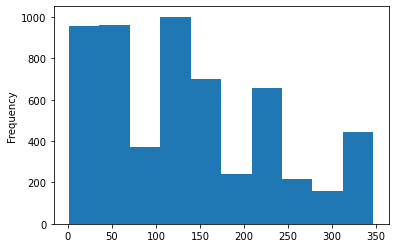

In [12]:
client_ids = dfs[0]['codigoclinica']

plt.figure()
client_ids.plot.hist()

unique_client_ids = set(client_ids)
unique_client_ids = list(unique_client_ids)
num_unique_client_ids = len(unique_client_ids)

print('unique client IDs:', unique_client_ids)
print('number of unique client IDs:', num_unique_client_ids)

In [13]:
X_full = dfs[0].copy()

target = "Followup1y"
temp = Y["Followup"]

n_full = X_full.shape[0]
n_features = X_full.shape[1]

y_full = np.zeros((n_full, ))
for i in range(n_full):
    if temp[i] >= 12:
        y_full[i] = 1
  
print(f"Full Data: \n X's shape: {X_full.shape} \n y's shape: {y_full.shape}")

Full Data: 
 X's shape: (5707, 66) 
 y's shape: (5707,)


In [115]:
def make_federated_data(X_full, y_full, selected_client_ids):
    X_res = pd.DataFrame()
    y_res = []
    y_res = np.array(y_res)
    for selected_id in selected_client_ids:
        X_selected = X_full.loc[X_full['codigoclinica'] == selected_id]
        X_res = pd.concat([X_res, X_selected], ignore_index=True)
        y_selected = y_full[X_selected.index]
        # y_res.append(y_selected)
        y_res = np.concatenate((y_res, y_selected))
    X_res.to_numpy
    X_res = tf.convert_to_tensor(X_res, dtype=tf.float32)
    y_res = y_res.reshape(-1,1)
    y_res = tf.convert_to_tensor(y_res, dtype=tf.int32)
    print(X_res.shape)
    print(y_res.shape)
#     res = {"x": X_res, "y": y_res}
#     res = (X_res, y_res)
    res = tf.data.Dataset.from_tensor_slices((X_res, y_res))
    return res

In [161]:
## Test making federated data
import random

selected_client_ids = random.choices(unique_client_ids, k=10)
print(selected_client_ids)

federated_train_data = make_federated_data(X_full, y_full, selected_client_ids)

BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

federated_train_data = federated_train_data.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

print(federated_train_data)


[290, 287, 334, 180, 280, 281, 287, 111, 270, 115]
(269, 66)
(269, 1)
<BatchDataset shapes: ((None, 66), (None, 1)), types: (tf.float32, tf.int32)>


In [162]:
def create_keras_model():
    model = keras.Sequential([
                keras.layers.InputLayer(input_shape=66),
                keras.layers.Dense(units=32, activation='relu',dtype='float64'),
                keras.layers.Dense(units=32, activation='relu',dtype='float64'),
                keras.layers.Dense(units=1, activation='sigmoid',dtype='float64')
            ])
    return model

def model_fn():
  # We _must_ create a new model here, and _not_ capture it from an external
  # scope. TFF will call this within different graph contexts.
    
    input_spec = collections.OrderedDict(
        x=tf.TensorSpec(shape=[None, 66], dtype=tf.float32),
        y=tf.TensorSpec(shape=[None, 1], dtype=tf.int32))
    keras_model = create_keras_model()
    return tff.learning.from_keras_model(
      keras_model,
      input_spec=input_spec,
      loss=tf.keras.losses.BinaryCrossentropy(),
      metrics=[tf.keras.metrics.BinaryAccuracy()])

In [163]:
iterative_process = tff.learning.build_federated_averaging_process(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=0.02),
    server_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=1.0))

In [164]:
str(iterative_process.initialize.type_signature)

'( -> <model=<trainable=<float64[66,32],float64[32],float64[32,32],float64[32],float64[32,1],float64[1]>,non_trainable=<>>,optimizer_state=<int64>,delta_aggregate_state=<value_sum_process=<>,weight_sum_process=<>>,model_broadcast_state=<>>@SERVER)'

In [165]:
state = iterative_process.initialize()

In [166]:
state, metrics = iterative_process.next(state, [federated_train_data])
print('round  1, metrics={}'.format(metrics))

round  1, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('value_sum_process', ()), ('weight_sum_process', ())])), ('train', OrderedDict([('binary_accuracy', 0.43866172), ('loss', 8.658614)])), ('stat', OrderedDict([('num_examples', 269)]))])


In [167]:
NUM_ROUNDS = 21
for round_num in range(2, NUM_ROUNDS):
  state, metrics = iterative_process.next(state, [federated_train_data])
  print('round {:2d}, metrics={}'.format(round_num, metrics))

round  2, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('value_sum_process', ()), ('weight_sum_process', ())])), ('train', OrderedDict([('binary_accuracy', 0.535316), ('loss', 3.3275735)])), ('stat', OrderedDict([('num_examples', 269)]))])
round  3, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('value_sum_process', ()), ('weight_sum_process', ())])), ('train', OrderedDict([('binary_accuracy', 0.65055764), ('loss', 0.68271804)])), ('stat', OrderedDict([('num_examples', 269)]))])
round  4, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('value_sum_process', ()), ('weight_sum_process', ())])), ('train', OrderedDict([('binary_accuracy', 0.65055764), ('loss', 0.68102926)])), ('stat', OrderedDict([('num_examples', 269)]))])
round  5, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('value_sum_process', ()), ('weight_sum_process', ())])), ('train', OrderedDict([('binary_accuracy', 0.65055764), ('loss', 